In [ ]:
#import relevant Libraries or access Keys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt
import seaborn as sns
import difflib
import os
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import coordination_network_toolkit as coord_net_tk
import networkx as nx
from langdetect import detect
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.collocations import*
from nltk import word_tokenize
from nltk import bigrams
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer, word_tokenize, TweetTokenizer
from nltk.tag import StanfordNERTagger
from nltk.stem import WordNetLemmatizer
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import string
import PyCrowdTangle as pct
import re
from stop_words import get_stop_words
from wordcloud import WordCloud, STOPWORDS
from ProText import gen, low, dig,stopw, lemma, stem, spell, clean_len, WCloud, countvec, tfidf
import gensim
#import gsdmm
from newscatcher import Newscatcher, urls, describe_url
import glob
import time

In [ ]:
#pip install dask

In [ ]:
data= pd.read_csv("C:\xx\nomore-novjan-combined.csv", low_memory=False)

In [ ]:
data.shape

In [ ]:
data.columns

In [ ]:
data.tail(5)

In [ ]:
# Make a copy of my dataset
data=data.copy()

In [ ]:
data.rename(columns={'Hit Sentence' :'tweet'},inplace=True)

In [ ]:
#Extract tweets by language
amh_tweets=(data.loc[data['Language'] == 'Amharic'])
amh_tweets

In [ ]:
#Save Amharic tweets to local device
#amh_tweets.to_csv('amharic_tweets.csv')

In [ ]:
#Count variable for counting and graph purposes
for i in range(data.shape[0]):
    data.loc[i, 'Count']=1

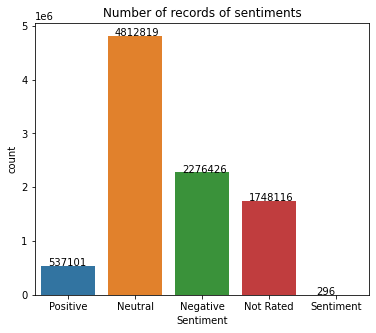

In [ ]:
#plot number of records of sentiments
plt.figure(figsize=(6,5))
plt.title("Number of records of sentiments")
plot = sns.countplot(x = 'Sentiment', data=data)
for p in plot.patches:
    plot.annotate(p.get_height(),(p.get_x()+0.1 ,p.get_height()+50))


In [ ]:
#Extract tweets by location
ch_tweets=(data.loc[data['Country'] == "China"])
ch_tweets

In [ ]:
#Checking for Days with highest tweet activity
spikerecord=data.pivot_table(values=['counter'], index='Alternate Date Format', aggfunc=np.sum).reset_index().sort_values('counter', ascending=False).head(20)
alt.Chart(data_Ls).mark_bar().encode(x='Alternate Date Format:N', y=alt.Y('counter', sort='-x'), color='Alternate Date Format', tooltip=['Alternate Date Format']).interactive()

In [ ]:
#Extract retweets
Retweeted=data['tweet'].str.extract(r'(RT @\w+)')

In [ ]:
# Store the source of retweeted posts
data['source'] = Retweeted

In [ ]:
#Display top retweeted accounts: The accounts that recieved the most number of retweets
data['source'].value_counts()[:20]

In [ ]:
#sources(accounts) that recived more than 1000k retweets
source=data['source'].value_counts().loc[lambda x: x>1000]

In [ ]:
#we have 757 accounts that recived the most number of retweets
source.shape

(757,)

In [ ]:
#Plot top 20 accounts
source[:20].plot(kind='barh')

In [ ]:
#top 10 accounts
source.head(20)

In [ ]:
data['source'] = data['source'].str.replace('RT @', '')

In [ ]:
# Top retweeted posts and counts of retweets
pd.options.display.max_colwidth = 200
data['tweet'].value_counts().rename_axis('Tweets').reset_index(name='counts')[:20]

In [ ]:
#Count variable for counting and graph purposes
for i in range(data.shape[0]):
    data.loc[i, 'Count']=1

In [ ]:
# Top 10 tweets with high number of Total Interactions
data_Ls=data.pivot_table(values=['Engagement'],index='tweet', aggfunc=np.sum).reset_index().sort_values('Engagement', ascending=False).head(10)
alt.Chart(data_Ls).mark_bar().encode(x='Engagement', y=alt.Y('tweet:N', sort='-x'), color='tweet', tooltip=['tweet']).interactive()

In [ ]:
#get tweets from an account
xx = data[data['source'].isin(['xx'])]

In [ ]:
pd.options.display.max_colwidth = 200
xx['tweet'].value_counts().rename_axis('Tweets').reset_index(name='counts')

In [ ]:
# Top 20 posts from the account with high number of total interactions
data_Ls=xx.pivot_table(values=['Reach'], index='tweet', aggfunc=np.sum).reset_index().sort_values('Reach', ascending=False).head(20)
alt.Chart(data_Ls).mark_bar().encode(x='Reach', y=alt.Y('tweet:N', sort='-x'), color='tweet', tooltip=['tweet']).interactive()

In [ ]:
#Most retweeted posts with their source and the retweeter account
most_retweeted= data[['tweet','source','Influencer']]

In [ ]:
most_retweeted.head(5)

In [ ]:
#get retweets
RT = data[data['tweet'].str.startswith("RT", na=False)]

In [ ]:
RT.shape

(1394799, 37)

In [ ]:
RT['Influencer'].nunique()

93416

In [ ]:
RT['Influencer'].value_counts()

In [ ]:
#retweets with their original source of tweet
RT.head(5)

In [ ]:
#influencer who retweets the most
RT['Influencer'].value_counts()[:20]

In [ ]:
#accounts retweeted more than 80 times
rt=RT['Influencer'].value_counts().loc[lambda x: x>80]

In [ ]:
#we have 59 accounts retweeting more than 80 times
rt.shape

(3372,)

In [ ]:
rt.nunique()

557

In [ ]:
rt.sum()

741179

In [ ]:
# percent of total rewteet network
rt.sum()/RT.shape[0]

0.5313876766473162

In [ ]:
# percent of unique accounts
rt.nunique()/RT['Influencer'].nunique()

0.005962576004110645

In [ ]:
rt.head(59)# all of this accounts were bot accounts they have 100 to 60% bot indication

In [ ]:
#plot top 20 accounts
rt[:20].plot(kind='barh',color='green')

In [ ]:
#get original tweets
original=data[~data['tweet'].str.contains('RT')]

In [ ]:
original.shape

(353145, 38)

In [ ]:
# Unique accounts
original['Influencer'].nunique()

36352

In [ ]:
original['Influencer'].value_counts()

In [ ]:
#accounts that tweeted more than 50 tweets
tweet=original['Influencer'].value_counts().loc[lambda x: x>30]

In [ ]:
original.head(5)

In [ ]:
#we have 1415 accounts that tweet more than 50 times
tweet.shape

(2363,)

In [ ]:
tweet.sum()

218614

In [ ]:
tweet.nunique()

316

In [ ]:
# percent of total original tweet network
tweet.sum()/original.shape[0]

0.6190488326324881

In [ ]:
tweet.nunique()/original['Influencer'].nunique()

0.008692781690140846

In [ ]:
tweet.head(10)

In [ ]:
#get quoted tweets
Q = data[data['tweet'].str.contains('QT')]

In [ ]:
Q.shape

(295303, 38)

In [ ]:
Q['Influencer'].nunique()

52833

In [ ]:
Q['Influencer'].value_counts()

In [ ]:
quoted=Q['Influencer'].value_counts().loc[lambda x: x>20]
quoted

In [ ]:
quoted.sum()

167957

In [ ]:
quoted.nunique()

250

In [ ]:
quoted.sum()/Q.shape[0]

0.5687615770920038

In [ ]:
quoted.nunique()/Q['Influencer'].nunique()

0.004731891052940397

In [ ]:
quoted.head(10)

In [ ]:
#accounts that tweet more than 50 times(Amplifiers of #nomore)
#@lilyesha_lilye, @mekdes73819861, @teddyyeneniguss,@mic_tes,@kari_kara15,@amity_araya,@ethiopia_unity1,@yonast98,@ayelgndes are bot account with 100% and 90% bot indication
#@abiyfrom,@balesage,@temesgenbishaw,@meru_maj,@emeyenextethiop,@ethan09t,@addisalexander  has 60% and 70%bot indication
#@surafeltilahu11,@et_elias_et, @henok_tekeste,@borumeti 30% and 40% bot indication the activity looks normal
pd.set_option('display.max_rows', None)
tweet.head(84)